In [1]:
from datetime import datetime
import os
import requests 
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np

In [2]:
page_source = requests.get('https://www.worldometers.info/coronavirus/').content
data = BeautifulSoup(page_source,'html.parser')

In [3]:
all_data  = data.find_all('table')
today_data = all_data[0]
yeaserday_data = all_data[1]
twodaysago_data = all_data[2]

In [4]:
column_data=yeaserday_data.find_all('th')
columns = [i.text for i in column_data]
columns

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [5]:
columns[0] = 'index'
columns

['index',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [6]:
for i in range(len(columns)):
  columns[i] = columns[i].replace('\xa0',' ')
  columns[i] = columns[i].replace('\n',' ')

In [7]:
columns

['index',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop ',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [8]:
row_data = []

tr_data = yeaserday_data.find_all('tr',attrs={'data-continent':None})
for i in tr_data:
  td=[]
  td_data = i.find_all('td')
  td = [j.text for j in td_data]
  row_data.append(td)

In [9]:
df = pd.DataFrame(data = row_data,columns=columns)

In [10]:
df.drop(['index'],axis=1,inplace=True)
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,World,"307,862,169","+1,882,244","5,505,966","+3,492","259,523,340","+560,206","42,832,863","93,980","39,496",706.4,,,,All,\n,,,,,
2,China,"103,619",+165,"4,636",,"95,591",+140,"3,392",26,72,3,"160,000,000","111,163","1,439,323,776",Asia,"13,891","310,467",9,0.1,,2
3,USA,"61,263,030","+308,616","859,356",+308,"42,257,508","+36,220","18,146,166","22,835","183,446","2,573","834,570,497","2,499,044","333,955,957",North America,5,389,0,924,0.9,"54,337"
4,India,"35,708,442","+180,438","483,936",+146,"34,500,172","+46,569","724,334","8,944","25,494",346,"690,034,525","492,656","1,400,642,995",Asia,39,"2,894",2,129,0.1,517


In [11]:
df.drop([0],axis=0, inplace=True)
df.reset_index(drop = True,inplace=True)

In [12]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"307,862,169","+1,882,244","5,505,966","+3,492","259,523,340","+560,206","42,832,863","93,980","39,496",706.4,,,,All,\n,,,,,
1,China,"103,619",+165,"4,636",,"95,591",+140,"3,392",26,72,3,"160,000,000","111,163","1,439,323,776",Asia,"13,891","310,467",9,0.1,,2
2,USA,"61,263,030","+308,616","859,356",+308,"42,257,508","+36,220","18,146,166","22,835","183,446","2,573","834,570,497","2,499,044","333,955,957",North America,5,389,0,924,0.9,"54,337"
3,India,"35,708,442","+180,438","483,936",+146,"34,500,172","+46,569","724,334","8,944","25,494",346,"690,034,525","492,656","1,400,642,995",Asia,39,"2,894",2,129,0.1,517
4,Brazil,"22,523,907","+24,382","620,031",+50,"21,626,836",,"277,040","8,318","104,831","2,886","63,776,166","296,829","214,858,253",South America,10,347,3,113,0.2,"1,289"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Samoa,3,,,,3,,0,,15,,,,"200,420",Australia/Oceania,"66,807",,,,,
222,Saint Helena,2,,,,2,,0,,328,,,,"6,104",Africa,"3,052",,,,,
223,Micronesia,1,,,,1,,0,,9,,,,"116,857",Australia/Oceania,"116,857",,,,,
224,Tonga,1,,,,1,,0,,9,,,,"107,517",Australia/Oceania,"107,517",,,,,


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country,Other        226 non-null    object
 1   TotalCases           226 non-null    object
 2   NewCases             226 non-null    object
 3   TotalDeaths          226 non-null    object
 4   NewDeaths            226 non-null    object
 5   TotalRecovered       226 non-null    object
 6   NewRecovered         226 non-null    object
 7   ActiveCases          226 non-null    object
 8   Serious,Critical     226 non-null    object
 9   Tot Cases/1M pop     226 non-null    object
 10  Deaths/1M pop        226 non-null    object
 11  TotalTests           226 non-null    object
 12  Tests/ 1M pop        226 non-null    object
 13  Population           226 non-null    object
 14  Continent            226 non-null    object
 15  1 Caseevery X ppl    226 non-null    object
 16  1 Deathe

In [14]:
def reformat_data(x):
  x = x.replace('\n','')
  x = x.strip()
  if x == '':
    x = np.nan
  return x

In [15]:
df = df.applymap(reformat_data)

In [16]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"307,862,169","+1,882,244","5,505,966","+3,492","259,523,340","+560,206","42,832,863","93,980","39,496",706.4,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
1,China,"103,619",+165,"4,636",NaN,"95,591",+140,"3,392",26,72,3,"160,000,000","111,163","1,439,323,776",Asia,"13,891","310,467",9,0.1,NaN,2
2,USA,"61,263,030","+308,616","859,356",+308,"42,257,508","+36,220","18,146,166","22,835","183,446","2,573","834,570,497","2,499,044","333,955,957",North America,5,389,0,924,0.9,"54,337"
3,India,"35,708,442","+180,438","483,936",+146,"34,500,172","+46,569","724,334","8,944","25,494",346,"690,034,525","492,656","1,400,642,995",Asia,39,"2,894",2,129,0.1,517
4,Brazil,"22,523,907","+24,382","620,031",+50,"21,626,836",NaN,"277,040","8,318","104,831","2,886","63,776,166","296,829","214,858,253",South America,10,347,3,113,0.2,"1,289"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Samoa,3,NaN,NaN,NaN,3,NaN,0,NaN,15,NaN,NaN,NaN,"200,420",Australia/Oceania,"66,807",NaN,NaN,NaN,NaN,NaN
222,Saint Helena,2,NaN,NaN,NaN,2,NaN,0,NaN,328,NaN,NaN,NaN,"6,104",Africa,"3,052",NaN,NaN,NaN,NaN,NaN
223,Micronesia,1,NaN,NaN,NaN,1,NaN,0,NaN,9,NaN,NaN,NaN,"116,857",Australia/Oceania,"116,857",NaN,NaN,NaN,NaN,NaN
224,Tonga,1,NaN,NaN,NaN,1,NaN,0,NaN,9,NaN,NaN,NaN,"107,517",Australia/Oceania,"107,517",NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country,Other        226 non-null    object
 1   TotalCases           226 non-null    object
 2   NewCases             158 non-null    object
 3   TotalDeaths          215 non-null    object
 4   NewDeaths            111 non-null    object
 5   TotalRecovered       226 non-null    object
 6   NewRecovered         143 non-null    object
 7   ActiveCases          226 non-null    object
 8   Serious,Critical     159 non-null    object
 9   Tot Cases/1M pop     224 non-null    object
 10  Deaths/1M pop        213 non-null    object
 11  TotalTests           209 non-null    object
 12  Tests/ 1M pop        209 non-null    object
 13  Population           222 non-null    object
 14  Continent            224 non-null    object
 15  1 Caseevery X ppl    222 non-null    object
 16  1 Deathe

In [18]:
df[['NewCases','NewDeaths','NewRecovered']] = df[['NewCases','NewDeaths','NewRecovered']].applymap(lambda x : str(x).replace('+',''))

In [19]:
df.shape

(226, 21)

In [20]:
def covert_numeric(x):
  if x:
    x = pd.to_numeric(x,errors='coerce')
  return x

In [21]:
df[df.columns[1:14].append(df.columns[15:])] = df[df.columns[1:14].append(df.columns[15:])].applymap(lambda x : str(x).replace(',',''))
df[df.columns[1:14].append(df.columns[15:])]= df[df.columns[1:14].append(df.columns[15:])].applymap(covert_numeric)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country,Other        226 non-null    object 
 1   TotalCases           226 non-null    int64  
 2   NewCases             158 non-null    float64
 3   TotalDeaths          215 non-null    float64
 4   NewDeaths            111 non-null    float64
 5   TotalRecovered       219 non-null    float64
 6   NewRecovered         136 non-null    float64
 7   ActiveCases          219 non-null    float64
 8   Serious,Critical     159 non-null    float64
 9   Tot Cases/1M pop     224 non-null    float64
 10  Deaths/1M pop        213 non-null    float64
 11  TotalTests           209 non-null    float64
 12  Tests/ 1M pop        209 non-null    float64
 13  Population           222 non-null    float64
 14  Continent            224 non-null    object 
 15  1 Caseevery X ppl    222 non-null    flo

In [23]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,307862169,1882244.0,5505966.0,3492.0,259523340.0,560206.0,42832863.0,93980.0,39496.0,706.4,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
1,China,103619,165.0,4636.0,NaN,95591.0,140.0,3392.0,26.0,72.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,13891.0,310467.0,9.0,0.1,NaN,2.0
2,USA,61263030,308616.0,859356.0,308.0,42257508.0,36220.0,18146166.0,22835.0,183446.0,2573.0,834570497.0,2499044.0,3.339560e+08,North America,5.0,389.0,0.0,924.0,0.9,54337.0
3,India,35708442,180438.0,483936.0,146.0,34500172.0,46569.0,724334.0,8944.0,25494.0,346.0,690034525.0,492656.0,1.400643e+09,Asia,39.0,2894.0,2.0,129.0,0.1,517.0
4,Brazil,22523907,24382.0,620031.0,50.0,21626836.0,NaN,277040.0,8318.0,104831.0,2886.0,63776166.0,296829.0,2.148583e+08,South America,10.0,347.0,3.0,113.0,0.2,1289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Samoa,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,2.004200e+05,Australia/Oceania,66807.0,NaN,NaN,NaN,NaN,NaN
222,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,328.0,NaN,NaN,NaN,6.104000e+03,Africa,3052.0,NaN,NaN,NaN,NaN,NaN
223,Micronesia,1,NaN,NaN,NaN,1.0,NaN,0.0,NaN,9.0,NaN,NaN,NaN,1.168570e+05,Australia/Oceania,116857.0,NaN,NaN,NaN,NaN,NaN
224,Tonga,1,NaN,NaN,NaN,1.0,NaN,0.0,NaN,9.0,NaN,NaN,NaN,1.075170e+05,Australia/Oceania,107517.0,NaN,NaN,NaN,NaN,NaN


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
def bar_create(data,limit,color):
  for i in range(len(data.index)):
    if int(data.iloc[i]) >= limit:
      plt.bar(data.index[i],data.iloc[i],color = color[0])
    else:
      plt.bar(data.index[i],data.iloc[i],color = color[1])

In [63]:
new_case =df[['Continent','NewCases']].groupby('Continent').sum()
new_case.drop('All',axis=0,inplace=True)

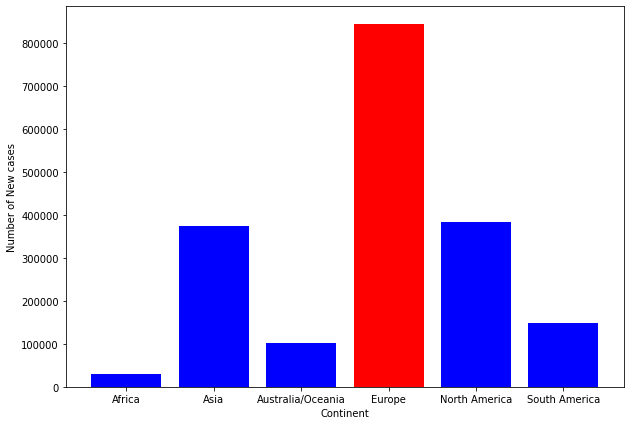

In [64]:
plt.figure(figsize=(10,7))
bar_create(new_case,500000,['red','blue'])
plt.xlabel('Continent')
plt.ylabel('Number of New cases')
plt.show()

Europian countries has highest new covid cases

In [31]:
active_cases =df[['Continent','ActiveCases']].groupby('Continent').sum()
active_cases.drop('All',axis=0,inplace=True)

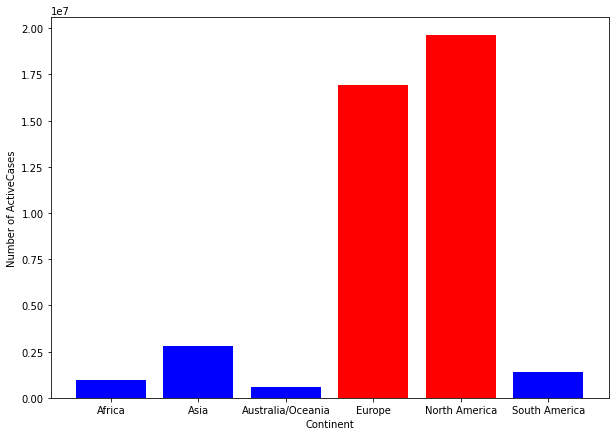

In [67]:
plt.figure(figsize=(10,7))
bar_create(active_cases,int(active_cases.mean()),['red','blue'])
plt.xlabel('Continent')
plt.ylabel('Number of ActiveCases')
plt.show()

In [68]:
df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/ 1M pop ',
       'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [71]:
eroup_data = df[df['Continent']=='Europe']

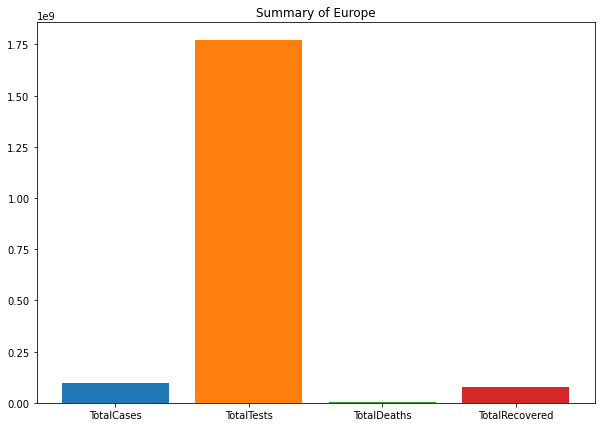

In [83]:
plt.figure(figsize=(10,7))
plt.title('Summary of Europe')
plt.bar('TotalCases',eroup_data['TotalCases'].sum())

plt.bar('TotalTests',eroup_data['TotalTests'].sum())
plt.bar('TotalDeaths',eroup_data['TotalDeaths'].sum())
plt.bar('TotalRecovered',eroup_data['TotalRecovered'].sum())
plt.show()

In [85]:
!wget('https://github.com/owid/covid-19-data/blob/master/public/data/archived/ecdc/total_cases.csv')


/bin/bash: -c: line 0: syntax error near unexpected token `'https://github.com/owid/covid-19-data/blob/master/public/data/archived/ecdc/total_cases.csv''
/bin/bash: -c: line 0: `wget('https://github.com/owid/covid-19-data/blob/master/public/data/archived/ecdc/total_cases.csv')'


In [98]:
covid_d = pd.read_csv('covid_data.csv')
covid_d.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
covid_d.tail()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,Month
330,2020-11-25,59903030,45202.0,34300.0,77000.0,6351.0,14634.0,4.0,140.0,1381782.0,129085.0,4751.0,27848.0,253349.0,98927.0,7413.0,86016.0,451990.0,262.0,126953.0,568444.0,5335.0,2916.0,239.0,386.0,144147.0,161.0,81739.0,9992.0,6118708.0,72.0,149.0,129348.0,2757.0,673.0,307.0,23869.0,342444.0,10400.0,265.0,...,4445.0,772252.0,31735.0,3047.0,1605066.0,20967.0,16187.0,5300.0,6247.0,231599.0,303392.0,7369.0,623.0,11971.0,509.0,3926.0,30.0,2872.0,6488.0,90213.0,460916.0,746.0,18406.0,647976.0,161365.0,1538794.0,12591165.0,1521.0,4870.0,72039.0,1.0,26.0,100498.0,1316.0,2.0,766.0,2114.0,17466.0,9398.0,11
331,2020-11-26,60552696,45402.0,34944.0,78025.0,6428.0,14742.0,4.0,140.0,1390375.0,130870.0,4778.0,27854.0,259245.0,102396.0,7469.0,86185.0,454146.0,263.0,128449.0,571076.0,5423.0,2974.0,239.0,386.0,144276.0,161.0,83328.0,9992.0,6166606.0,72.0,150.0,133060.0,2777.0,673.0,307.0,23915.0,347466.0,10526.0,266.0,...,4445.0,775502.0,32318.0,3047.0,1617355.0,21469.0,16187.0,5305.0,6272.0,237665.0,308254.0,7459.0,625.0,12008.0,509.0,3942.0,30.0,2889.0,6503.0,91307.0,467730.0,746.0,18890.0,661858.0,162662.0,1557007.0,12777754.0,1521.0,4988.0,72227.0,1.0,26.0,100817.0,1321.0,3.0,766.0,2124.0,17535.0,9508.0,11
332,2020-11-27,61102596,45402.0,35600.0,79110.0,6534.0,14821.0,4.0,141.0,1399418.0,132346.0,4791.0,27867.0,264692.0,106101.0,7482.0,86347.0,456438.0,266.0,130012.0,573187.0,5515.0,2974.0,241.0,389.0,144390.0,161.0,84252.0,9992.0,6204220.0,72.0,150.0,136628.0,2777.0,677.0,307.0,24022.0,353097.0,10526.0,269.0,...,4445.0,778571.0,32887.0,3084.0,1628208.0,22028.0,16187.0,5307.0,6329.0,243129.0,312722.0,7542.0,639.0,12044.0,509.0,3961.0,30.0,2904.0,6570.0,92475.0,474606.0,746.0,19115.0,677189.0,163967.0,1574562.0,12883845.0,1521.0,5117.0,72409.0,1.0,26.0,100817.0,1331.0,3.0,766.0,2137.0,17553.0,9623.0,11
333,2020-11-28,61718735,45616.0,36245.0,NaN,6610.0,NaN,4.0,141.0,1407264.0,133594.0,4808.0,27874.0,269510.0,109813.0,7496.0,86515.0,458711.0,270.0,131633.0,NaN,5587.0,NaN,242.0,395.0,144494.0,161.0,85431.0,NaN,6238350.0,72.0,150.0,139955.0,NaN,NaN,307.0,NaN,359064.0,NaN,269.0,...,4445.0,781941.0,33375.0,3092.0,1628208.0,22501.0,16864.0,5311.0,6362.0,NaN,317017.0,7635.0,648.0,12082.0,509.0,3966.0,30.0,2926.0,6586.0,93770.0,481198.0,748.0,19588.0,693407.0,165250.0,1589301.0,13091758.0,1521.0,5303.0,72409.0,1.0,26.0,101215.0,1339.0,3.0,766.0,2148.0,17569.0,9714.0,11
334,2020-11-29,62271031,45844.0,36790.0,81212.0,6670.0,15087.0,4.0,141.0,1413362.0,134768.0,4833.0,27885.0,274275.0,114025.0,7496.0,86645.0,460619.0,270.0,133324.0,NaN,5647.0,2974.0,251.0,396.0,144592.0,161.0,85431.0,9992.0,6290272.0,72.0,150.0,141747.0,2816.0,681.0,307.0,24117.0,364810.0,10526.0,274.0,...,4445.0,785139.0,33824.0,3104.0,NaN,22988.0,17068.0,5312.0,6406.0,NaN,317017.0,7715.0,651.0,12118.0,509.0,3977.0,30.0,2946.0,6630.0,94980.0,487912.0,748.0,19944.0,693407.0,166502.0,1605172.0,13246651.0,1538.0,5511.0,72409.0,1.0,26.0,101524.0,1341.0,3.0,766.0,2160.0,17589.0,9822.0,11


In [123]:
covid_d.drop(0,axis=0,inplace=True)

In [124]:
covid_d['date'].dtype

dtype('<M8[ns]')

In [125]:
covid_d['date'] = pd.to_datetime(covid_d['date'],format='%Y-%m-%d')

In [140]:
covid_d['Month'] = covid_d['date'].dt.month
a = covid_d[['Month','Afghanistan','Canada','India','Austria','United Kingdom','China']].groupby('Month').sum()

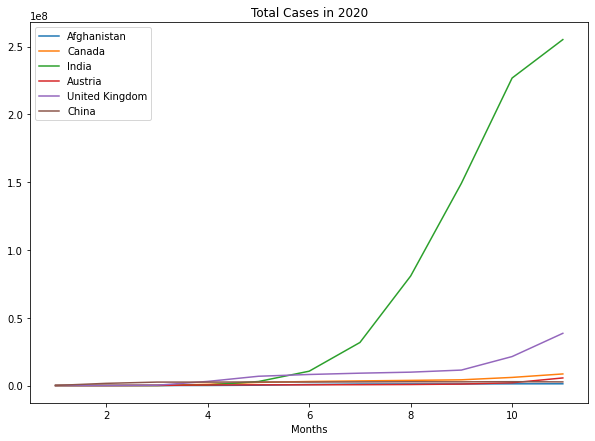

In [141]:
plt.figure(figsize=(10,7))
plt.title('Total Cases in 2020')
plt.plot(a)
plt.xlabel('Months')
plt.legend(['Afghanistan','Canada','India','Austria','United Kingdom','China'])
plt.show()